## Titanic Survival Prediction: A Machine Learning Approach

Welcome to the Titanic Survival Prediction Challenge Notebook. In this notebook, we will explore and tackle the task of predicting the survival of passengers aboard the Titanic using machine learning techniques. The sinking of the Titanic in 1912 was a tragic event, and our goal is to build a model that can accurately predict whether a passenger survived or not based on various features such as age, gender, ticket class, and more. By analysing the available data and applying machine learning algorithms, we aim to develop a predictive model that can provide insights into the factors influencing survival. Join us on this journey as we explore, preprocess the data, engineer relevant features, and train different machine learning models to find the most accurate predictor of survival. Let's embark on this challenge and see how well we can predict the fate of the Titanic's passengers.

## Problem and Data Explanation
The dataset for this competition is provided in two files: `train.csv` and `test.csv`.
It provided for this challenge contains information about the passengers on board the Titanic, including their demographic details, ticket information, cabin location, and survival status. It is divided into two subsets: a training set (used to train our model) and a test set (used to evaluate the model's performance).

The training set consists of a collection of records, where each record represents a passenger. It contains the following features:
- Survival: Indicates whether the passenger survived (1) or not (0).
- Pclass: Represents the ticket class (1st, 2nd, or 3rd class).
- Sex: Denotes the passenger's gender (male or female).
- Age: Represents the age of the passenger in years.
- SibSp: Indicates the number of siblings/spouses aboard the Titanic.
- Parch: Represents the number of parents/children aboard the Titanic.
- Ticket: Denotes the ticket number.
- Fare: Represents the fare paid for the ticket.
- Cabin: Indicates the cabin number.
- Embarked: Represents the port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton).

The test set contains similar features, except for the 'Survival' column, which is missing and needs to be predicted by our model.

By analysing and utilising this dataset, we aim to build a machine learning model that can accurately predict the survival outcome of passengers based on their characteristics.

This is a __supervised  binary classification  machine learning problem__:

* __Supervised__: provided with the labels for the training data
* __Binary classification__: Labels are discrete values with 2 classes

### Objective

The objective of our ML project is to develop a machine learning model that can accurately predict the survival outcome of passengers aboard the Titanic. Given various features such as age, gender, ticket class, etc., our goal is to create a model that can classify whether a passenger survived or not. By achieving this objective, we aim to gain insights into the factors that influenced survival during the tragic sinking of the Titanic in 1912.

The `Survived` values in the Titanic ML challenge represent the survival outcome of passengers aboard the Titanic. The `Survived` column contains binary values as follows:

- 0: Indicates that the passenger did not survive.
- 1: Indicates that the passenger survived.

### Metric
The metric used to evaluate the performance of our machine learning model in the Titanic ML challenge is accuracy. 

Accuracy is calculated using the following formula:

$$\text{Accuracy} = \frac{\text{True Positives + True Negatives}}{\text{True Positives + False Positives + False Negatives + True Negatives}}$$

The formula and the information regarding accuracy as a performance metric can be found in the article [here](https://towardsdatascience.com/guide-to-confusion-matrices-classification-performance-metrics-a0ebfc08408e#:~:text=Of%20the%20many%20performance%20metrics,the%20number%20of%20all%20cases.). The article provides detailed explanations and insights into different classification performance metrics, including accuracy.

In this formula, ***True Positives (TP)*** represents the number of correctly predicted survival cases, ***True Negatives (TN)*** represents the number of correctly predicted non-survival cases, ***False Positives (FP)*** represents the number of incorrectly predicted survival cases, and ***False Negatives (FN)*** represents the number of incorrectly predicted non-survival cases.

The accuracy metric considers both the correctly classified positive and negative instances and divides it by the total number of instances to determine the accuracy score.

To calculate accuracy in Python, we can use the `accuracy_score` function from the `sklearn.metrics` library. It takes the true labels and predicted labels as inputs and returns the accuracy score.

By utilising the accuracy metric and the provided formula, we can evaluate the performance of our model and assess its ability to predict the survival outcome of passengers accurately in the Titanic ML challenge.


## Roadmap

The ultimate objective of our Titanic ML challenge is to develop a machine learning model that accurately predicts the survival outcome of passengers aboard the Titanic based on the provided features. However, before we get carried away with modeling, it's important to understand the problem and data. Also, we want to evaluate numerous models before choosing one as the "best" and after building a model, we want to investigate the predictions. Our roadmap is therefore as follows:

1. Understand the problem (we're almost there already)
2. Exploratory Data Analysis
3. Feature engineering to create a dataset for machine learning
4. Compare several baseline machine learning models
5. Try more complex machine learning models
6. Optimize the selected model
7. Investigate model predictions in context of problem
6. Draw conclusions and lay out next steps 

The steps laid out above are iterative meaning that while we will go through them one at a time, we might go back to an earlier step and revisit some of our decisions. In general, data science is a non-linear pracice where we are constantly evaluating our past decisions and making improvements. In particular, feature engineering, modeling, and optimization are steps that we often repeat because we never know if we got them right the first time!

# Getting Started

We have a pretty good grasp of the problem, so we'll move into the Exploratory Data Analysis (EDA) and feature engineering. For the EDA we'll examine any interesting anomalies, trends, correlations, or patterns that can be used for feature engineering and for modeling. We'll make sure to investigate our data both quantitatively (with statistics) and visually (with figures). 

Once we have a good grasp of the data and any potentially useful relationships, we can do some feature engineering (the most important part of the machine learning pipeline) and establish a baseline model. 

With all that info in mind (don't worry if you haven't got all the details), let's get started! 

#### Imports

We'll use a familiar stack of data science libraries: `Pandas`, `numpy`, `matplotlib`, `seaborn`, and eventually `sklearn` for modeling. 

In [1]:
# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Set a few plotting defaults
%matplotlib inline
plt.style.use('fivethirtyeight')
plt.rcParams['font.size'] = 18
plt.rcParams['patch.edgecolor'] = 'k'

/home/deep/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
pd.options.display.max_columns = 15

# Read in data
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


That gives us a look at all of the columns which don't appear to be in any order. To get a quick overview of the data we use `df.info()`.

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Analyzing the data structure, we observe the presence of 5 integer columns, 2 float (numeric) columns, and 5 object columns. The integer columns likely represent either Boolean variables, capable of assuming values 0 or 1, or [ordinal variables](https://www.ma.utexas.edu/users/mks/statmistakes/ordinal.html) with discrete ordered values. However, the object columns pose a potential challenge as they cannot be directly inputted into a machine learning model.

Now, let's take a quick look at the test data, which contains a significantly larger number of rows (individuals) compared to the training data. Notably, the test data has one less column since it does not include the "Survived" attribute.

In [4]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


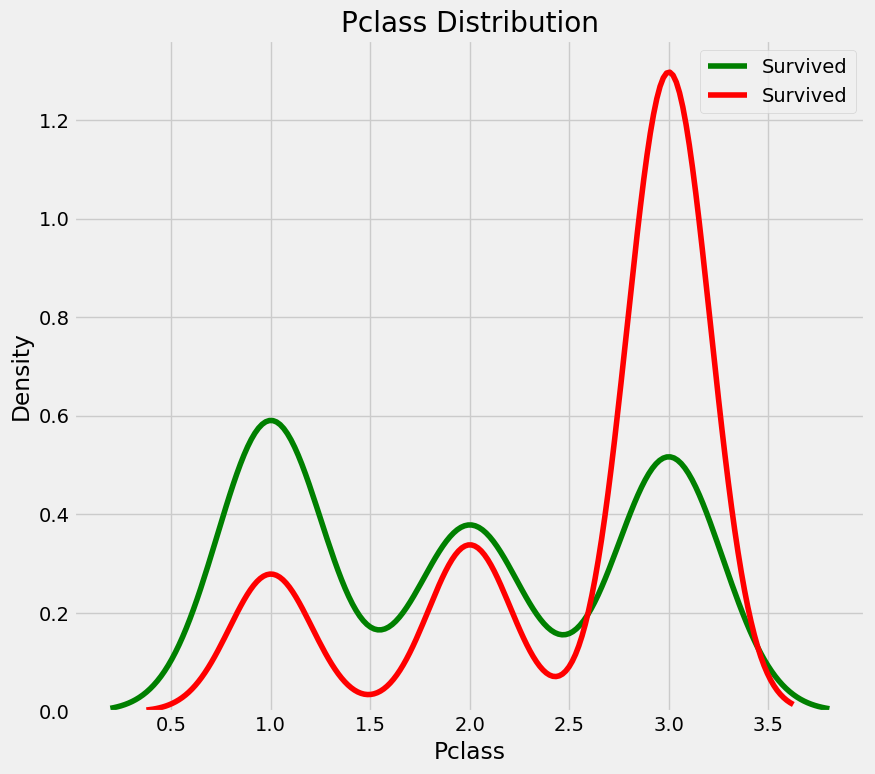

In [5]:
from collections import OrderedDict

plt.figure(figsize = (20, 16))
plt.style.use('fivethirtyeight')

# Color mapping
colors = OrderedDict({1: 'green', 0: 'red'})

# Iterate through the float columns
for i, col in enumerate(train.select_dtypes('int64').drop(["Survived", "PassengerId", "Parch", "SibSp"], axis=1)):
    ax = plt.subplot(4, 2, i + 1)
    for _survived, color in colors.items():
        sns.kdeplot(train.loc[train['Survived'] == _survived, col].dropna(), 
                    ax = ax, color = color, label ="Survived")
        plt.legend()
    plt.title(f'{col.capitalize()} Distribution'); plt.xlabel(f'{col}'); plt.ylabel('Density')

plt.subplots_adjust(top = 2)

#### ***Based on the observations:***

1. The majority of passengers were in Pclass=3, but a significant number of them did not survive, suggesting a lower survival rate for passengers in the third class.
2. In contrast, most passengers in Pclass=1, which refers to the first class, managed to survive, indicating a higher survival rate among passengers in the upper class.

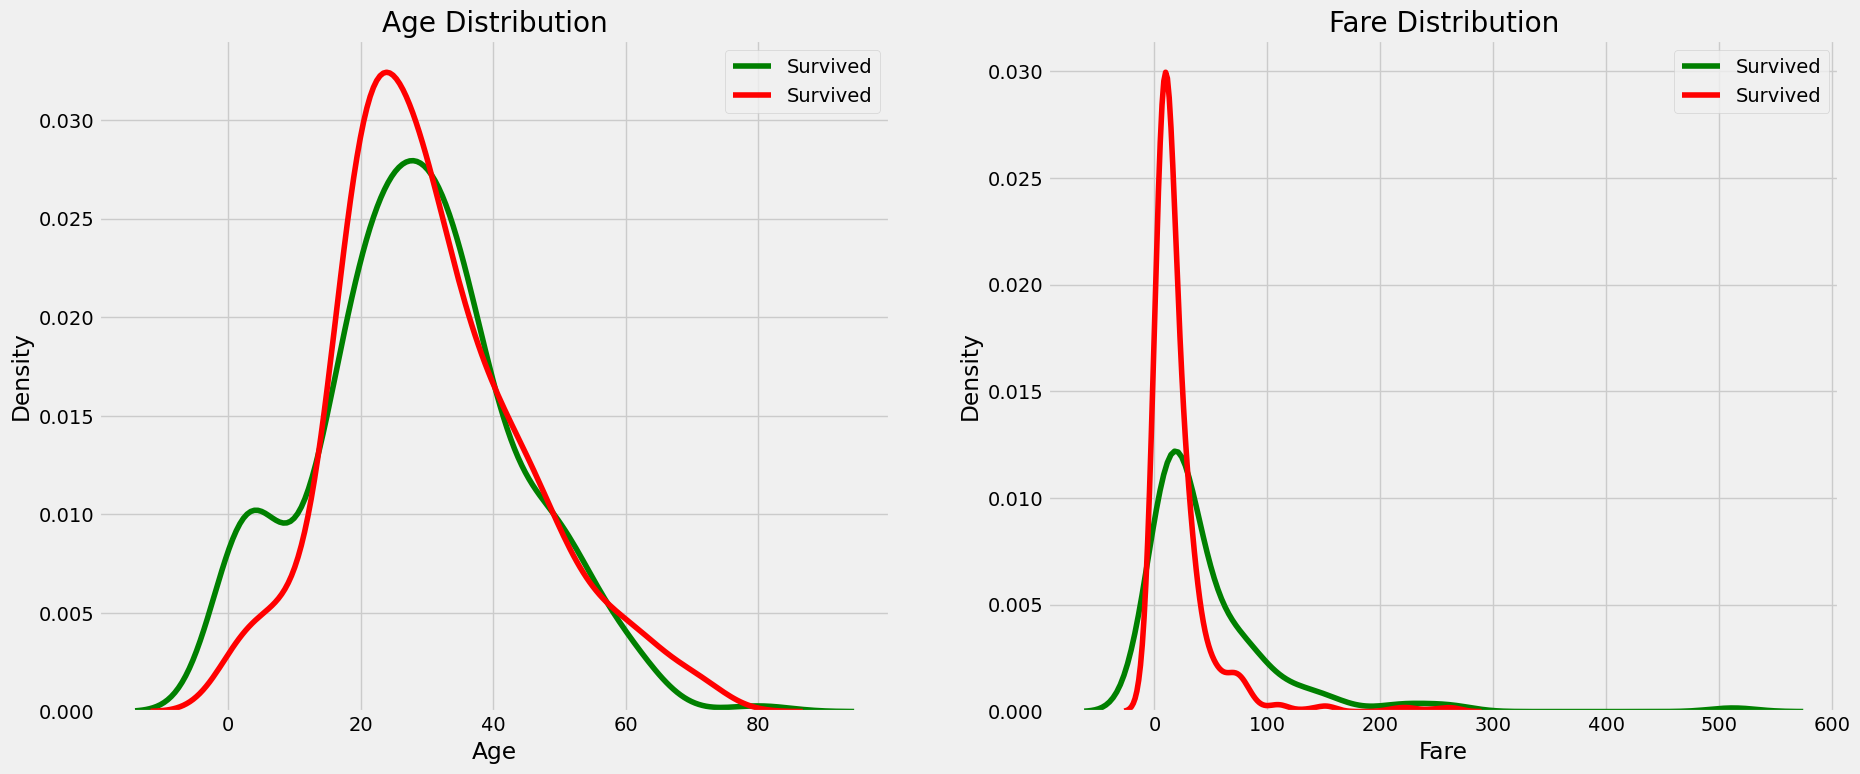

In [6]:
from collections import OrderedDict

plt.figure(figsize = (20, 16))
plt.style.use('fivethirtyeight')

# Color mapping
colors = OrderedDict({1: 'green', 0: 'red'})

# Iterate through the float columns
for i, col in enumerate(train.select_dtypes('float')):
    ax = plt.subplot(4, 2, i + 1)
    for _survived, color in colors.items():
        sns.kdeplot(train.loc[train['Survived'] == _survived, col].dropna(), 
                    ax = ax, color = color, label ="Survived")
        plt.legend()
    plt.title(f'{col.capitalize()} Distribution'); plt.xlabel(f'{col}'); plt.ylabel('Density')

plt.subplots_adjust(top = 2)

#### ***Based on the observations from the Titanic dataset:***

1. Infants (age <= 4) had a high survival rate, indicating that efforts were made to prioritize their safety during the evacuation.
2. The oldest passengers, specifically those with an age of 80, managed to survive, showcasing the resilience and survival of some elderly individuals.
3. A significant number of passengers in the 15-25 age group did not survive, suggesting that they were less likely to receive priority during the evacuation process.
4. The majority of passengers fall within the age range of 15-35, indicating a relatively younger demographic on board the Titanic.
5. Passengers who paid higher fares had a higher rate of survival, indicating a possible correlation between fare price and priority given during the evacuation process.

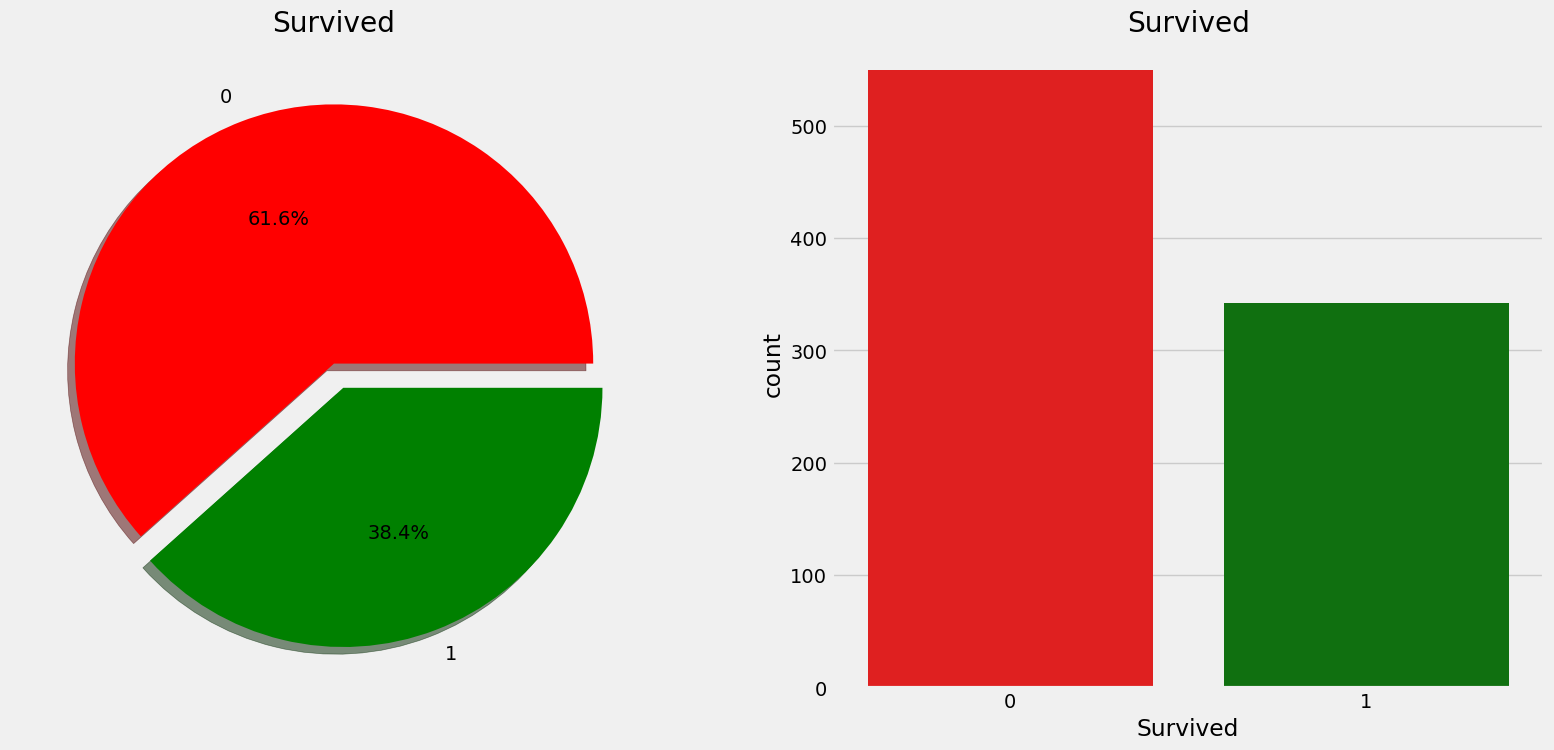

In [7]:
# Create subplots
fig, ax = plt.subplots(1, 2, figsize=(18, 8))

# Pie chart
train['Survived'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True, colors=['red', 'green'])
ax[0].set_title('Survived')
ax[0].set_ylabel('')

# Count plot
sns.countplot(x='Survived', data=train, ax=ax[1], palette=['red', 'green'])
ax[1].set_title('Survived')

# Display the plots
plt.show()

#### The aftermath of the accident reveals a grim reality: the number of survivors is alarmingly low.

In a dataset of 891 passengers, a mere fraction of approximately 350 individuals managed to survive. Astonishingly, this amounts to a meager 38.4% survival rate among the entire training set, emphasizing the devastating impact of the crash.

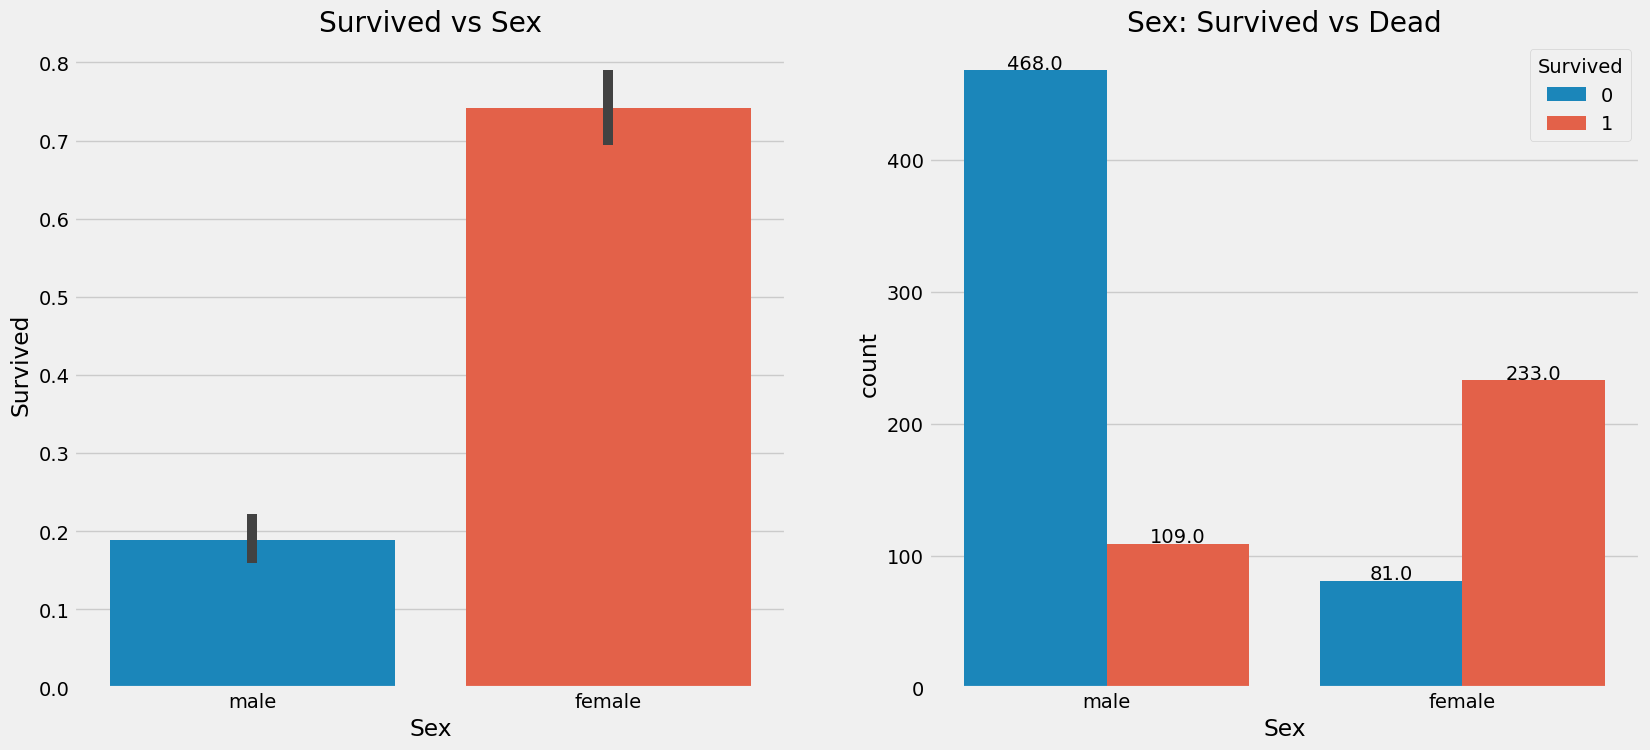

In [8]:
# Create subplots
fig, ax = plt.subplots(1, 2, figsize=(18, 8))

# Bar plot - Survived vs Sex
sns.barplot(x='Sex', y='Survived', data=train, ax=ax[0])
ax[0].set_title('Survived vs Sex')

# Count plot - Sex: Survived vs Dead
sns.countplot(x='Sex', hue='Survived', data=train, ax=ax[1])
ax[1].set_title('Sex: Survived vs Dead')

# Add count numbers on each bar in the count plot
for p in ax[1].patches:
    ax[1].annotate(p.get_height(), (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

# Display the plots
plt.show()

Fascinating, isn't it? The ship carries a significantly larger number of men compared to women. Surprisingly, though, the number of women who were saved is nearly double the number of men who survived. ***The survival rate for women aboard the ship stands at approximately 75%, while for men, it hovers around 18-19%.***

This particular aspect appears to hold great significance for modeling. However, is it truly the best choice? Let us explore other features and assess their potential.

/home/deep/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:712: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/home/deep/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:717: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


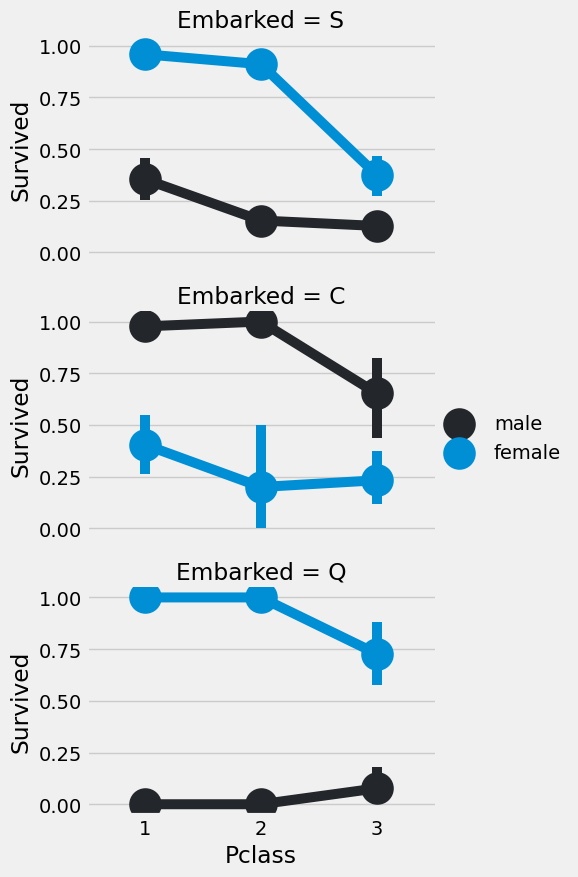

In [9]:
# grid = sns.FacetGrid(train_df, col='Embarked')
grid = sns.FacetGrid(train, row='Embarked',aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex')
grid.add_legend();

#### ***Notable Findings:***

- The survival rate of female passengers was significantly higher than that of males.
- In the "Embarked=C" category, an exception was observed where males had a higher survival rate. This could be attributed to a correlation between the passenger's class (Pclass), the port of embarkation (Embarked), and their survival outcome. However, it does not necessarily imply a direct relationship between the port of embarkation and survival.
- Among males, those in Pclass=3 exhibited a higher survival rate compared to those in Pclass=2 for ports of embarkation C and Q.
- The survival rates for male passengers in Pclass=3 varied across different ports of embarkation.

These observations shed light on the impact of factors such as gender, passenger class, and port of embarkation on the survival outcomes of Titanic passengers.

/tmp/ipykernel_214146/2929709308.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


<Figure size 1800x1200 with 0 Axes>

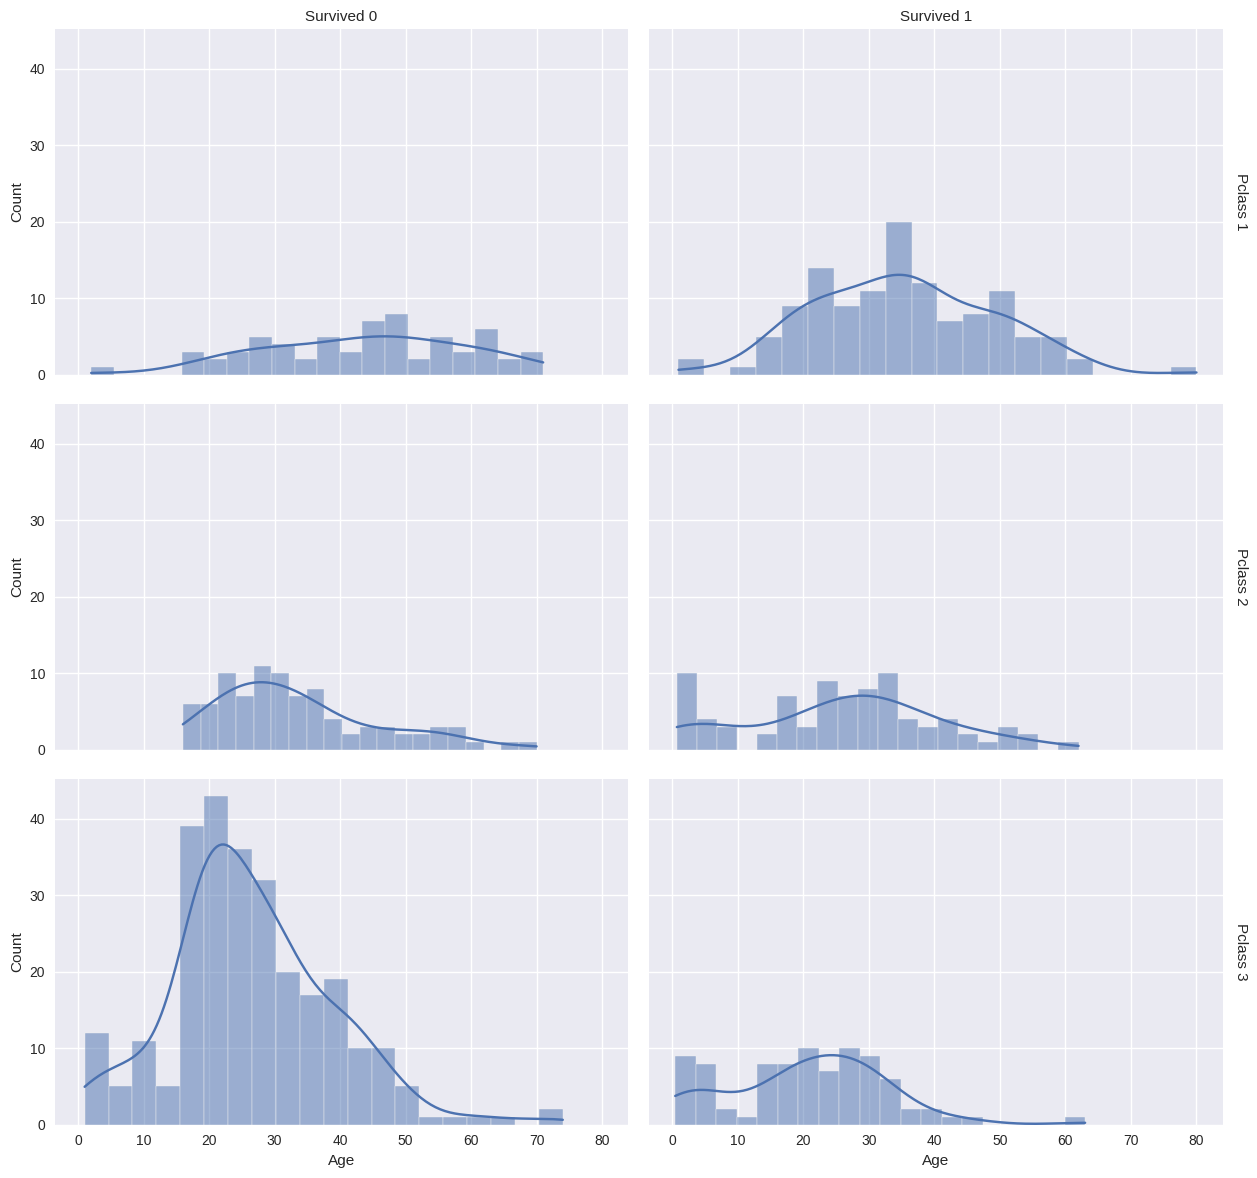

In [10]:
plt.figure(figsize=(18, 12))
plt.style.use('seaborn')

# Create the FacetGrid plot
grid = sns.FacetGrid(train, col='Survived', row='Pclass', aspect=1.6, height=4, margin_titles=True)
grid.map(sns.histplot, 'Age', alpha=0.5, bins=20, kde=True)

# Set the titles and labels
grid.set_titles(row_template='Pclass {row_name}', col_template='Survived {col_name}')
grid.set_xlabels('Age')
grid.set_ylabels('Count')

# Add legend
#legend_labels = ['Not Survived', 'Survived']
#for ax in grid.axes.flat:
 #   ax.legend(labels=legend_labels)

plt.tight_layout()
plt.show();

#### ***Analysis:***

1. While the majority of passengers belonged to Pclass=3, a significant proportion among them unfortunately did not survive.
2. Interestingly, infants belonging to both Pclass=2 and Pclass=3 exhibited a notably higher rate of survival compared to other age groups.
3. It is worth noting that a considerable number of passengers in Pclass=1 managed to survive, indicating a significantly higher survival rate within this particular class.
4. The distribution of passenger ages varied across different passenger classes (Pclass), showcasing distinct patterns.

In [11]:
# Add null Survived column to test
#test['Survived'] = np.nan
train = train.drop(['Ticket', 'Cabin'], axis=1)
test = test.drop(['Ticket', 'Cabin'], axis=1)
combine = [train, test]

## Uncovered Variables

In the realm of exploratory data analysis, unearthing elusive variables stands as a critical task. These variables, concealed within the data, necessitate our attention for optimal handling before delving into the realm of machine learning. The key lies in formulating an ingenious approach to fill in these voids based on the distinctive attributes, demanding a comprehensive study of the data definitions.

Initially, let us direct our focus towards assessing the prevalence of missing variables within each column.

In [12]:
# Number of missing in each column
missing = pd.DataFrame(train.isnull().sum()).rename(columns = {0: 'total'})

# Create a percentage missing
missing['percent'] = missing['total'] / len(train)

missing.sort_values('percent', ascending = False).head(13).drop('Survived')

,total,percent
Age,177,0.198653
Embarked,2,0.002245
PassengerId,0,0.000000
Pclass,0,0.000000
Name,0,0.000000
Sex,0,0.000000
SibSp,0,0.000000
Parch,0,0.000000
Fare,0,0.000000


We don't have to worry about the `Survived` becuase we made that `NaN` for the test data. Age and Cabin features have an important part of missing values.

In [13]:
#complete missing age with median

for data in combine:
    data['Age'].fillna(data['Age'].median(), inplace = True)

    #complete embarked with mode
    data['Embarked'].fillna(data['Embarked'].mode()[0], inplace = True)

    #complete missing fare with median
    data['Fare'].fillna(data['Fare'].median(), inplace = True)
    
#delete the cabin feature/column and others previously stated to exclude in train dataset
#drop_column = ['PassengerId','Cabin', 'Ticket']
#train.drop(drop_column, axis=1, inplace = True)
#test.drop(['Cabin', 'Ticket', "Survived"], axis=1, inplace = True)

In [14]:
# Number of missing in each column
missing = pd.DataFrame(train.isnull().sum()).rename(columns = {0: 'total'})

# Create a percentage missing
missing['percent'] = missing['total'] / len(train)

missing.sort_values('percent', ascending = False).head(15).drop('Survived')

,total,percent
PassengerId,0,0.0
Pclass,0,0.0
Name,0,0.0
Sex,0,0.0
Age,0,0.0
SibSp,0,0.0
Parch,0,0.0
Fare,0,0.0
Embarked,0,0.0


# Feature Engineering

Now, let's rephrase the following text:

Before discarding the "Name" and "PassengerId" features, we aim to investigate whether the "Name" feature can be manipulated to extract titles and assess their correlation with survival.

In the code snippet provided below, we utilize regular expressions to extract the "Title" feature. The regular expression pattern (\w+.) matches the first word ending with a dot character within the "Name" feature. By setting the "expand" parameter to False, we obtain a DataFrame as the result.

In [15]:
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(train['Title'], train['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


We have the option to substitute numerous titles with a more commonly used name or categorize them as `Rare`.

In [16]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
    'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

In [17]:
train_df = train.drop(['Name', 'PassengerId'], axis=1)
test_df = test.drop(['Name'], axis=1)
combine = [train_df, test_df]

In [18]:
test_df

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,892,3,male,34.5,0,0,7.8292,Q,Mr
1,893,3,female,47.0,1,0,7.0000,S,Mrs
2,894,2,male,62.0,0,0,9.6875,Q,Mr
3,895,3,male,27.0,0,0,8.6625,S,Mr
4,896,3,female,22.0,1,1,12.2875,S,Mrs
...,...,...,...,...,...,...,...,...,...
413,1305,3,male,27.0,0,0,8.0500,S,Mr
414,1306,1,female,39.0,0,0,108.9000,C,Rare
415,1307,3,male,38.5,0,0,7.2500,S,Mr
416,1308,3,male,27.0,0,0,8.0500,S,Mr


In [19]:
for dataset in combine:
    dataset["Sex"] = dataset["Sex"].map({"male": 0, "female":1})
    dataset["Title"] = dataset["Title"].map({"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5})
    dataset["Title"] = dataset["Title"].astype(int)

Evacuation can pose additional challenges for larger families as they strive to locate their siblings, parents, or other relatives amidst the chaos. To address this, I have introduced a new attribute called "FamilySize," which represents the combined count of SibSp (number of siblings/spouses aboard), Parch (number of parents/children aboard), and 1 (including the passenger). By incorporating this feature, we can better understand and accommodate the needs of families during evacuation.

In [20]:
for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

train_df[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


In [21]:
for dataset in combine:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1

train_df[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


***In order to simplify the analysis, we have decided to replace the Parch, SibSp, and FamilySize features with a new feature called "IsAlone." This feature indicates whether a passenger is travelling alone or with family members. By adopting the IsAlone feature, we can streamline the evaluation process and focus on the distinction between solo passengers and those accompanied by others.***

In [22]:
train_df = train_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
test_df = test_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
combine = [train_df, test_df]

train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,0,22.0,7.2500,S,1,0
1,1,1,1,38.0,71.2833,C,3,0
2,1,3,1,26.0,7.9250,S,2,1
3,1,1,1,35.0,53.1000,S,3,0
4,0,3,0,35.0,8.0500,S,1,1


In [23]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,0,22.0,7.2500,0,1,0
1,1,1,1,38.0,71.2833,1,3,0
2,1,3,1,26.0,7.9250,0,2,1
3,1,1,1,35.0,53.1000,0,3,0
4,0,3,0,35.0,8.0500,0,1,1


The general guidelines for correlation values are below, but these will change depending on who you ask ([source](http://www.statstutor.ac.uk/resources/uploaded/pearsons.pdf) for these):

*  .00-.19 “very weak”
*  .20-.39 “weak”
*  .40-.59 “moderate”
*  .60-.79 “strong”
*  .80-1.0 “very strong”

What these correlations show is that there are some weak relationships that hopefully our model will be able to use to learn a mapping from the features to the Target.

#### Correlation Heatmap 

One of my favorite plots is the correlation heatmap because it shows a ton of info in one image.

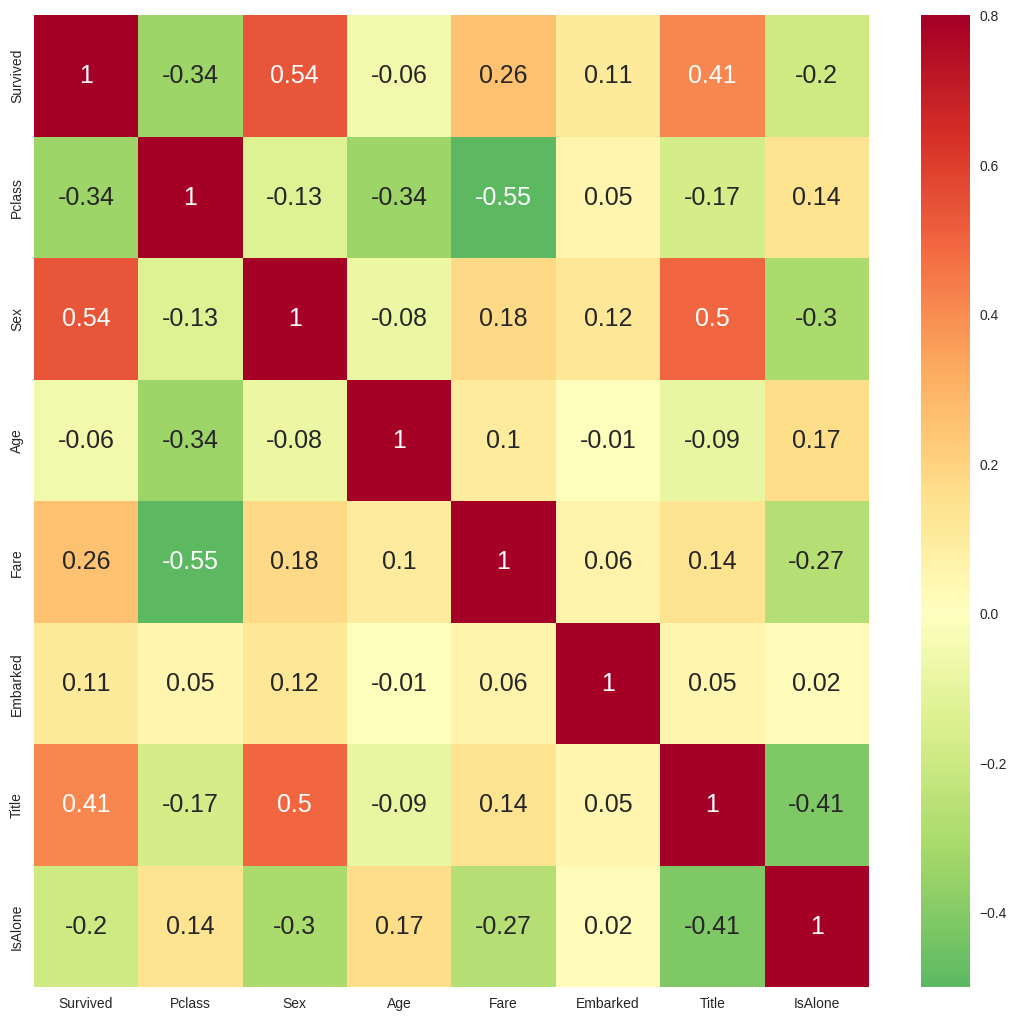

In [24]:
# Calculate the correlations
corr_mat = train_df.corr().round(2)

# Draw a correlation heatmap
plt.rcParams['font.size'] = 18
plt.figure(figsize = (12, 12))
sns.heatmap(corr_mat, vmin = -0.5, vmax = 0.8, center = 0, 
            cmap = plt.cm.RdYlGn_r, annot = True);

# Machine Learning Modeling

Once feature engineering/construction is done, we can get started with the machine learning! To first show the process of modeling, we'll use the capable Random Forest Classifier in Scikit-Learn.  Later we'll try several other models including the powerful Gradient Boosting Machine.

To assess our model, we'll use 10-fold cross validation on the training data. This will essentially _train and test the model 10 times_ using different splits of the training data. 10-fold cross validation is an effective method for estimating the performance of a model on the test set. We want to look at the average performance in cross validation as well as the standard deviation to see how much scores change between the folds. We use the `Accuracy` measure to evaluate performance.

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

In [29]:
X_train = train_df.drop("Survived", axis=1)
Y_train = train_df["Survived"]
X_test  = test_df.drop("PassengerId", axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

((891, 7), (891,), (418, 7))

Because we are going to be comparing different models, we want to scale the features (limit the range of each column to between 0 and 1). For many ensemble models this is not necessary, but when we use models that depend on a distance metric, such as KNearest Neighbors or the Support Vector Machine, feature scaling is an absolute necessity. When comparing different models, it's always safest to scale the features. We also impute the missing values with the median of the feature.

In [30]:
features = list(X_train.columns)

pipeline = Pipeline([('scaler', MinMaxScaler())])

# Fit and transform training data
train_set = pipeline.fit_transform(X_train)
test_set = pipeline.transform(X_test)

The data has no missing values and is scaled between zero and one. This means it can be directly used in any Scikit-Learn model. 

In [32]:
model = RandomForestClassifier(n_estimators=100, random_state=10, 
                               n_jobs = -1)
# 10 fold cross validation
cv_score = cross_val_score(model, X_train, Y_train, cv = 10, scoring = "accuracy")

print(f'10 Fold Cross Validation Accuracy Score = {round(cv_score.mean(), 4)} with std = {round(cv_score.std(), 4)}')

/home/deep/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/home/deep/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/home/deep/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/home/deep/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.0
  warnings.warn(f"A NumPy version >={n

10 Fold Cross Validation Accuracy Score = 0.8082 with std = 0.0451


## Feature Importances

With a tree-based model, we can look at the feature importances which show a relative ranking of the usefulness of features in the model. These represent the sum of the reduction in impurity at nodes that used the variable for splitting, but we don't have to pay much attention to the absolute value. Instead we'll focus on relative scores.

If we want to view the feature importances, we'll have to train a model on the whole training set. Cross validation does not return the feature importances. 

In [33]:
model.fit(X_train, Y_train)

# Feature importances into a dataframe
feature_importances = pd.DataFrame({'feature': features, 'importance': model.feature_importances_})
feature_importances.head()

,feature,importance
0,Pclass,0.097563
1,Sex,0.144737
2,Age,0.246442
3,Fare,0.287016
4,Embarked,0.032396


Below is a short function we'll use to plot the feature importances.

In [34]:
def plot_feature_importances(df, n = 10, threshold = None):
    """Plots n most important features. Also plots the cumulative importance if
    threshold is specified and prints the number of features needed to reach threshold cumulative importance.
    Intended for use with any tree-based feature importances. 
    
    Args:
        df (dataframe): Dataframe of feature importances. Columns must be "feature" and "importance".
    
        n (int): Number of most important features to plot. Default is 15.
    
        threshold (float): Threshold for cumulative importance plot. If not provided, no plot is made. Default is None.
        
    Returns:
        df (dataframe): Dataframe ordered by feature importances with a normalized column (sums to 1) 
                        and a cumulative importance column
    
    Note:
    
        * Normalization in this case means sums to 1. 
        * Cumulative importance is calculated by summing features from most to least important
        * A threshold of 0.9 will show the most important features needed to reach 90% of cumulative importance
    
    """
    plt.style.use('fivethirtyeight')
    
    # Sort features with most important at the head
    df = df.sort_values('importance', ascending = False).reset_index(drop = True)
    
    # Normalize the feature importances to add up to one and calculate cumulative importance
    df['importance_normalized'] = df['importance'] / df['importance'].sum()
    df['cumulative_importance'] = np.cumsum(df['importance_normalized'])
    
    plt.rcParams['font.size'] = 12
    
    # Bar plot of n most important features
    df.loc[:n, :].plot.barh(y = 'importance_normalized', 
                            x = 'feature', color = 'darkgreen', 
                            edgecolor = 'k', figsize = (12, 8),
                            legend = False, linewidth = 2)

    plt.xlabel('Normalized Importance', size = 18); plt.ylabel(''); 
    plt.title(f'{n} Most Important Features', size = 18)
    plt.gca().invert_yaxis()
    
    
    if threshold:
        # Cumulative importance plot
        plt.figure(figsize = (8, 6))
        plt.plot(list(range(len(df))), df['cumulative_importance'], 'b-')
        plt.xlabel('Number of Features', size = 16); plt.ylabel('Cumulative Importance', size = 16); 
        plt.title('Cumulative Feature Importance', size = 18);
        
        # Number of features needed for threshold cumulative importance
        # This is the index (will need to add 1 for the actual number)
        importance_index = np.min(np.where(df['cumulative_importance'] > threshold))
        
        # Add vertical line to plot
        plt.vlines(importance_index + 1, ymin = 0, ymax = 1.05, linestyles = '--', colors = 'red')
        plt.show();
        
        print('{} features required for {:.0f}% of cumulative importance.'.format(importance_index + 1, 
                                                                                  100 * threshold))
    
    return df


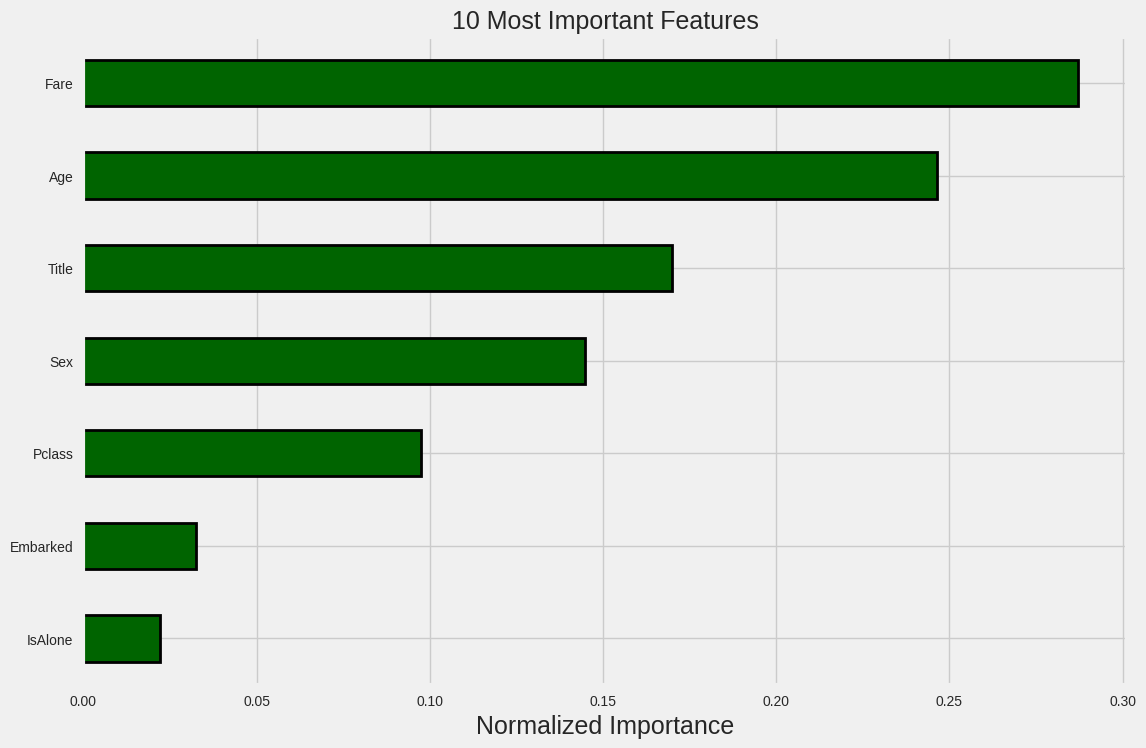

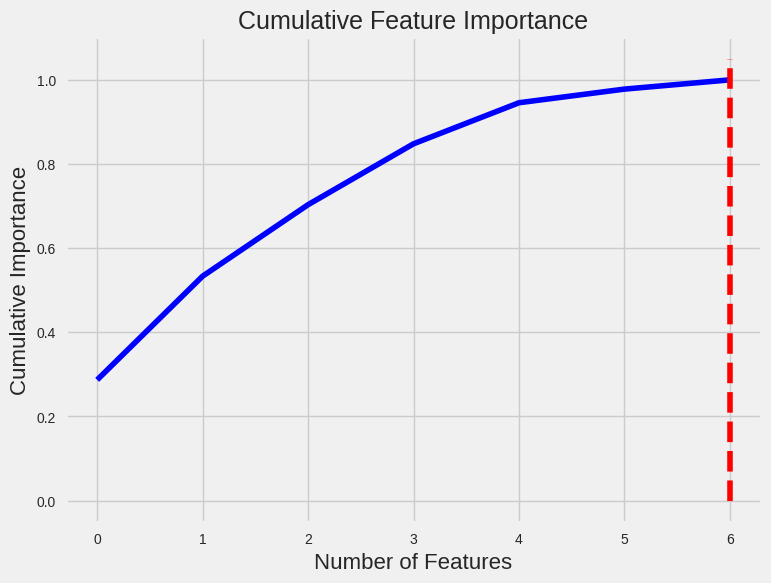

6 features required for 95% of cumulative importance.


In [35]:
norm_fi = plot_feature_importances(feature_importances, threshold=0.95)

# Model Selection

Now that we have a good set of features, it's time to get into the modeling. We already tried one basic model, the Random Forest Classifier which delivered a best accuracy of 0.8082. However, in machine learning, there is no way to know ahead of time which model will work best for a given dataset. The following plot shows that __there are some problems where even Gaussian Naive Bayes will outperform a gradient boosting machine__. This is from [an excellent paper by Randal Olson that discusses many points of machine learning](https://psb.stanford.edu/psb-online/proceedings/psb18/olson.pdf)

![algorithm_comparison](https://raw.githubusercontent.com/WillKoehrsen/Machine-Learning-Projects/master/algorithm_comparison.png)

What this plot tells us is that we have to try out a number of different models to see which is optimal. Most people eventually settle on the __gradient boosting machine__ and we will try that out, but for now we'll take a look at some of the other options.  There are literally dozens (maybe hundreds) of multi-class machine learning models if we look at the [Scikit-Learn documentation](http://scikit-learn.org/stable/modules/multiclass.html). We don't have to try them all, but we should sample from the options.

What we want to do is write a function that can evaluate a model. This will be pretty simple since we already wrote most of the code. In addition to the Random Forest Classifier, we'll try eight other Scikit-Learn models. Luckily, this dataset is relatively small and we can rapidly iterate through the models. We will make a dataframe to hold the results and the function will add a row to the dataframe for each model.

In [36]:
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegressionCV, RidgeClassifierCV
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier

In [40]:
import warnings 
from sklearn.exceptions import ConvergenceWarning

# Filter out warnings from models
warnings.filterwarnings('ignore', category = ConvergenceWarning)
warnings.filterwarnings('ignore', category = DeprecationWarning)
warnings.filterwarnings('ignore', category = UserWarning)

# Dataframe to hold results
model_results = pd.DataFrame(columns = ['model', 'cv_mean', 'cv_std'])

def cv_model(train, train_labels, model, name, model_results=None):
    """Perform 10 fold cross validation of a model"""
    
    cv_scores = cross_val_score(model, train, train_labels, cv = 10, scoring="accuracy", n_jobs = -1)
    print(f'10 Fold CV Score: {round(cv_scores.mean(), 5)} with std: {round(cv_scores.std(), 5)}')
    
    if model_results is not None:
        model_results = model_results.append(pd.DataFrame({'model': name, 
                                                           'cv_mean': cv_scores.mean(), 
                                                            'cv_std': cv_scores.std()},
                                                           index = [0]),
                                             ignore_index = True)

        return model_results

In [41]:
model_results = cv_model(X_train, Y_train, LinearSVC(), 
                         'LSVC', model_results)

/home/deep/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/home/deep/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/home/deep/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/home/deep/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.0
  warnings.warn(f"A NumPy version >={n

10 Fold CV Score: 0.68798 with std: 0.11645


That's one model to cross off the list (although we didn't perform hyperparameter tuning so the actual performance could possibly be improved).

In [42]:
model_results = cv_model(X_train, Y_train, 
                         GaussianNB(), 'GNB', model_results)

10 Fold CV Score: 0.77449 with std: 0.0397


In [43]:
model_results = cv_model(X_train, Y_train, 
                         MLPClassifier(hidden_layer_sizes=(32, 64, 128, 64, 32)),
                         'MLP', model_results)

10 Fold CV Score: 0.69147 with std: 0.04883


The multi-layer perceptron (a deep neural network) has decent performance. This might be an option if we are able to hyperparameter tune the network. However, the limited amount of data could be an issue with a neural network as these generally require hundreds of thousands of examples to learn effectively.

In [44]:
model_results = cv_model(X_train, Y_train, 
                          LinearDiscriminantAnalysis(), 
                          'LDA', model_results)

10 Fold CV Score: 0.79347 with std: 0.03499


In [45]:
model_results = cv_model(X_train, Y_train, 
                         RidgeClassifierCV(), 'RIDGE', model_results)

10 Fold CV Score: 0.79347 with std: 0.03499


In [46]:
for n in [5, 10, 20]:
    print(f'\nKNN with {n} neighbors\n')
    model_results = cv_model(X_train, Y_train, 
                             KNeighborsClassifier(n_neighbors = n),
                             f'knn-{n}', model_results)


KNN with 5 neighbors

10 Fold CV Score: 0.72172 with std: 0.04208

KNN with 10 neighbors

10 Fold CV Score: 0.70826 with std: 0.04349

KNN with 20 neighbors

10 Fold CV Score: 0.70608 with std: 0.05783


In [47]:
from sklearn.ensemble import ExtraTreesClassifier

model_results = cv_model(X_train, Y_train, 
                         ExtraTreesClassifier(n_estimators = 100, random_state = 10),
                         'EXT', model_results)

10 Fold CV Score: 0.79578 with std: 0.04349


## Comparing Model Performance

With the modeling results in a dataframe, we can plot them to see which model does the best.

In [48]:
model_results = cv_model(X_train, Y_train,
                          RandomForestClassifier(100, random_state=10),
                              'RF', model_results)

10 Fold CV Score: 0.80816 with std: 0.04512


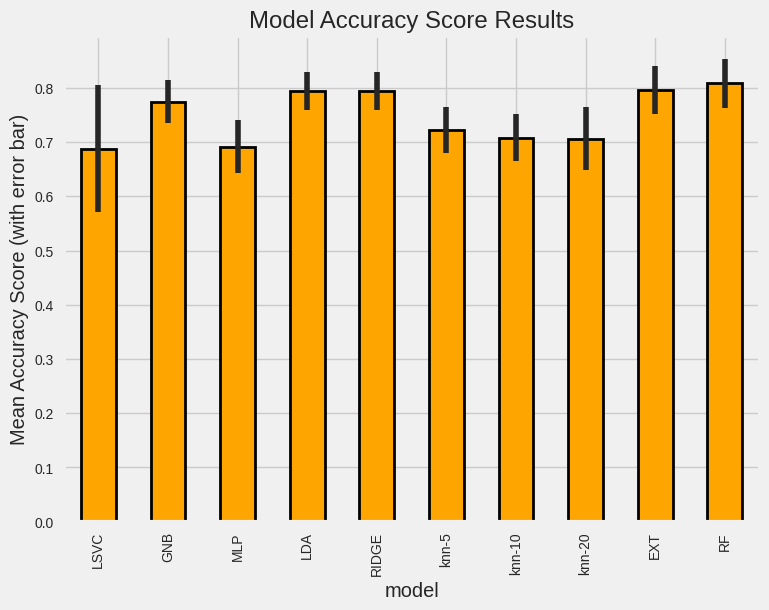

In [49]:
model_results.set_index('model', inplace = True)
model_results['cv_mean'].plot.bar(color = 'orange', figsize = (8, 6),
                                  yerr = list(model_results['cv_std']),
                                  edgecolor = 'k', linewidth = 2)
plt.title('Model Accuracy Score Results');
plt.ylabel('Mean Accuracy Score (with error bar)');
model_results.reset_index(inplace = True)

The most likely candidate seems to be the Random Forest because it does best right out of the box.  While we didn't tune any of the hyperparameters so the comparison between models is not perfect, these results reflect those of many other Kaggle competitiors finding that tree-based ensemble methods (including the Gradient Boosting Machine) perform very well on structured datasets. Hyperparameter performance does improve the performance of machine learning models, but we don't have time to try all possible combinations of settings for all models. The graph below ([from the paper by Randal Olson](https://psb.stanford.edu/psb-online/proceedings/psb18/olson.pdf)) shows the effect of hyperparameter tuning versus the default values in Scikit-Learn.

![hyperparameter_improvement](https://raw.githubusercontent.com/WillKoehrsen/Machine-Learning-Projects/master/hyperparameter_improvement.png)

In most cases the accuracy gain is less than 10% so the worst model is probably not suddenly going to become the best model through tuning. 

For now we'll say the random forest does the best. Later we'll look at using the Gradient Boosting Machine, although not implemented in Scikit-Learn. Now, let's turn to making a submission using the random forest.

# Making a Submission

In order to make a submission, we need the test data. Fortunately, we have the test data formatted in exactly the same manner as the train data. 

In [54]:
def submit(model, train, train_labels, test, test_df):
    """Train and test a model on the dataset"""
    
    # Train on the data
    model.fit(train, train_labels)
    predictions = model.predict(test)
    sns.heatmap(confusion_matrix(train_labels,result),cmap='winter',annot=True,fmt='2.0f')
    plt.show()
    submission = pd.DataFrame({
        "PassengerId": test_df["PassengerId"],
        "Survived": predictions
    })
    return submission 

Let's make a submission with the Random Forest.

In [55]:
rf_submission = submit(RandomForestClassifier(n_estimators = 100, 
                                              random_state=10, n_jobs = -1), 
                         X_train, Y_train, X_test, test_df)

rf_submission.to_csv('rf_submission.csv', index = False)

# Feature Selection

One potential method for improving model performance is feature selection. This is the process where we try to keep only the most useful features for our model. "Most useful" can mean many different things, and there are numerous heuristics for selecting the most important features.


### Recursive Feature Elimination with Random Forest

The `RFECV` in Sklearn stands for Recursive Feature Elimination with Cross Validation. The selector operates using a model with feature importances in an iterative manner. At each iteration, it removes either a fraction of features or a set number of features. The iterations continue until the cross validation score no longer improves. 

To create the `selector` object, we pass in the the model, the number of features to remove at each iteration, the cross validation folds, our custom scorer, and any other parameters to guide the selection.

In [56]:
from sklearn.feature_selection import RFECV

# Create a model for feature selection
estimator = RandomForestClassifier(random_state = 10, n_estimators = 100,  n_jobs = -1)

# Create the object
selector = RFECV(estimator, step = 1, cv = 3, scoring= "accuracy", n_jobs = -1)

In [57]:
selector.fit(X_train, Y_train)

/home/deep/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/home/deep/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/home/deep/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


RFECV(cv=3, estimator=RandomForestClassifier(n_jobs=-1, random_state=10),
      n_jobs=-1, scoring='accuracy')

5

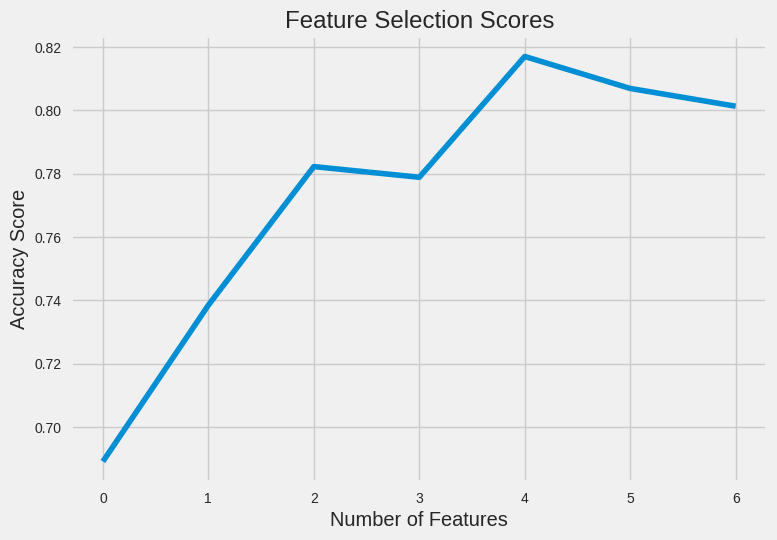

In [61]:
plt.plot(selector.cv_results_["mean_test_score"]);

plt.xlabel('Number of Features'); plt.ylabel('Accuracy Score'); plt.title('Feature Selection Scores');
selector.n_features_

We can see that the score improves as we add features up until 4 features. According to the selector, this is the optimal number of features.


In [62]:
train_selected = selector.transform(X_train)
test_selected = selector.transform(X_test)

In [65]:
rankings = pd.DataFrame({'feature': list(X_train.columns), 'rank': list(selector.ranking_)}).sort_values('rank')
rankings.head(10)

,feature,rank
0,Pclass,1
1,Sex,1
2,Age,1
3,Fare,1
5,Title,1
4,Embarked,2
6,IsAlone,3


In [67]:
# Convert back to dataframe
selected_features = X_train.columns[np.where(selector.ranking_==1)]
train_selected = pd.DataFrame(train_selected, columns = selected_features)
test_selected = pd.DataFrame(test_selected, columns = selected_features)

In [70]:
model_results = cv_model(train_selected, Y_train, model, 'RF-SEL', model_results)

10 Fold CV Score: 0.82276 with std: 0.05222


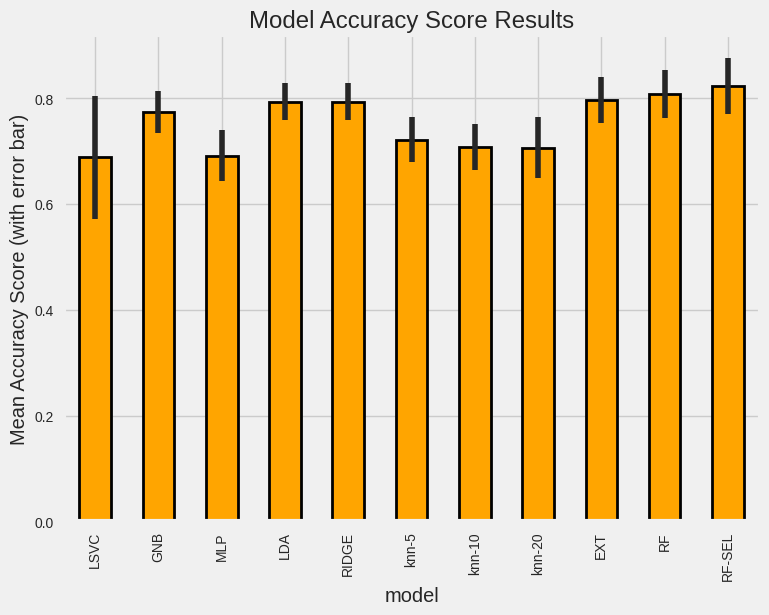

In [71]:
model_results.set_index('model', inplace = True)
model_results['cv_mean'].plot.bar(color = 'orange', figsize = (8, 6),
                                  yerr = list(model_results['cv_std']),
                                 edgecolor = 'k', linewidth = 2)
plt.title('Model Accuracy Score Results');
plt.ylabel('Mean Accuracy Score (with error bar)');
model_results.reset_index(inplace = True)

# Conclusions

In this notebook, we went through a step-by-step implementation of an entire data science solution to a real-world problem. Machine learning is really just a series of steps, each simple by themselves, with the overall result often extremely powerful. 

Our path was as follows:

1. Understand the problem
2. Exploratory Data Analysis
    * Deal with data issues
    * Fill in missing values
3. Feature Engineering
    * Aggregate data 
    * Feature selection in stages
4. Model Selection
    * Try many different models to see which one is most promising
    * Feature selection can also come into play
5. Model Optimization
    * Choose the best performing model and tune
6. Implementing best model
7. Investigate predictions
    * Identify model shortcomings
8. Try new techniques
    * Experiment and learn! 
  
As stated in the introduction, while these steps do have a general order, there is nothing preventing us from repeating them based on subsequent work. For example, we often go back to feature engineering/selection after modeling if we are not satisfied with our performance. After investigating predictions, we might return to the modeling stage and re-think our approach.

It's also important to keep in mind that machine learning is largely empirical: there are few established best practices so you need to constantly experiement to determine what works best. That's why we included the last step: we got to try out some new methods and even if they don't pay off for this project, they may be useful in the future. As data scientists we need to be constantly learning to do our work more effectively with the best tools possible.

Our final model does well compared to others in the competition, but overall is not extremely accurate. There might be ways to improve performance, but overall, we might not have enough data to achieve exceptional metrics. 
## Next Steps

Although we tried many possible approaches, there are still some methods that we did not implement but might prove useful:

* Further Hyperparameter tuning: we did not spend much time optimizing the model and there are other packages for optimization that we could try. 
* Further feature selection: we probably do not need to retain all of the features to get the same performance
* Ensembling or stacking multiple models. We could train models on different sections of the data and then combine their predictions to try and better separate the classes. 